In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score , recall_score , f1_score

# **Data Loading**

In [3]:
df = pd.read_csv('/content/Chronic_Kidney_Dsease_data.csv')

# **Data Exploration**

In [4]:
df.head()

PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          1   71       0          0                    0               2   
1          2   34       0          0                    1               3   
2          3   80       1          1                    0               1   
3          4   40       0          2                    0               1   
4          5   43       0          1                    1               2   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
0  31.069414        1            5.128112          1.676220  ...  7.556302   
1  29.692119        1           18.609552          8.377574  ...  6.836766   
2  37.394822        1           11.882429          9.607401  ...  2.144722   
3  31.329680        0           16.020165          0.408871  ...  7.077188   
4  23.726311        0            7.944146          0.780319  ...  3.553118   

   QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChemicals  \
0           76.076800                    0                              0   
1           40.128498                    0                              0   
2           92.872842                    0                              1   
3           90.080321                    0                              0   
4            5.258372                    0                              0   

   WaterQuality  MedicalCheckupsFrequency  MedicationAdherence  \
0             1                  1.018824             4.966808   
1             0                  3.923538             8.189275   
2             1                  1.429906             7.624028   
3             0                  3.226416             3.282688   
4             1                  0.285466             3.849498   

   HealthLiteracy  Diagnosis  DoctorInCharge  
0        9.871449          1    Confidential  
1        7.161765          1    Confidential  
2        7.354632          1    Confidential  
3        6.629587          1    Confidential  
4        1.437385          1    Confidential  

[5 rows x 54 columns]

In [5]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [7]:
df.isna().sum().sum()

0

In [8]:
df.nunique()

PatientID                        1659
Age                                71
Gender                              2
Ethnicity                           4
SocioeconomicStatus                 3
EducationLevel                      4
BMI                              1659
Smoking                             2
AlcoholConsumption               1659
PhysicalActivity                 1659
DietQuality                      1659
SleepQuality                     1659
FamilyHistoryKidneyDisease          2
FamilyHistoryHypertension           2
FamilyHistoryDiabetes               2
PreviousAcuteKidneyInjury           2
UrinaryTractInfections              2
SystolicBP                         90
DiastolicBP                        60
FastingBloodSugar                1659
HbA1c                            1659
SerumCreatinine                  1659
BUNLevels                        1659
GFR                              1659
ProteinInUrine                   1659
ACR                              1659
SerumElectrolytesSodium          1659
SerumElectrolytesPotassium       1659
SerumElectrolytesCalcium         1659
SerumElectrolytesPhosphorus      1659
HemoglobinLevels                 1659
CholesterolTotal                 1659
CholesterolLDL                   1659
CholesterolHDL                   1659
CholesterolTriglycerides         1659
ACEInhibitors                       2
Diuretics                           2
NSAIDsUse                        1659
Statins                             2
AntidiabeticMedications             2
Edema                               2
FatigueLevels                    1659
NauseaVomiting                   1659
MuscleCramps                     1659
Itching                          1659
QualityOfLifeScore               1659
HeavyMetalsExposure                 2
OccupationalExposureChemicals       2
WaterQuality                        2
MedicalCheckupsFrequency         1659
MedicationAdherence              1659
HealthLiteracy                   1659
Diagnosis                           2
DoctorInCharge                      1
dtype: int64

In [9]:
df.describe()

PatientID          Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.000000  1659.00000          1659.000000   
mean    830.000000    54.441230     0.515371     0.71308             0.977697   
std     479.056364    20.549757     0.499914     1.00043             0.776686   
min       1.000000    20.000000     0.000000     0.00000             0.000000   
25%     415.500000    36.000000     0.000000     0.00000             0.000000   
50%     830.000000    54.000000     1.000000     0.00000             1.000000   
75%    1244.500000    72.000000     1.000000     1.00000             2.000000   
max    1659.000000    90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670     0.455252            5.798787   
min          0.000000    15.033888     0.000000            0.021740   
25%          1.000000    21.471449     0.000000            5.051156   
50%          2.000000    27.652077     0.000000            9.951503   
75%          2.000000    34.015849     1.000000           14.967100   
max          3.000000    39.993532     1.000000           19.992713   

       PhysicalActivity  ...  MuscleCramps      Itching  QualityOfLifeScore  \
count       1659.000000  ...   1659.000000  1659.000000         1659.000000   
mean           5.024247  ...      3.525510     5.054869           49.730659   
std            2.866274  ...      2.026131     2.880460           27.827593   
min            0.001186  ...      0.006327     0.013697            0.087256   
25%            2.555038  ...      1.820793     2.532867           26.991708   
50%            5.072395  ...      3.572522     5.087086           48.970075   
75%            7.460563  ...      5.254956     7.552093           73.913997   
max            9.998167  ...      6.984636     9.998313           99.987510   

       HeavyMetalsExposure  OccupationalExposureChemicals  WaterQuality  \
count          1659.000000                    1659.000000   1659.000000   
mean              0.044002                       0.103074      0.197107   
std               0.205162                       0.304147      0.397934   
min               0.000000                       0.000000      0.000000   
25%               0.000000                       0.000000      0.000000   
50%               0.000000                       0.000000      0.000000   
75%               0.000000                       0.000000      0.000000   
max               1.000000                       1.000000      1.000000   

       MedicalCheckupsFrequency  MedicationAdherence  HealthLiteracy  \
count               1659.000000          1659.000000     1659.000000   
mean                   2.000336             4.947788        5.144973   
std                    1.141635             2.869959        2.901138   
min                    0.001082             0.005392        0.004436   
25%                    1.005802             2.498119        2.569561   
50%                    2.040635             4.974069        5.182949   
75%                    2.947213             7.499783        7.733253   
max                    3.999469             9.992345        9.993754   

         Diagnosis  
count  1659.000000  
mean      0.918626  
std       0.273492  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 53 columns]

In [10]:
df.duplicated().sum()

0

# **Data Analysis & Preprocessing**

In [11]:
palette = {'': 'lightcoral', 'diabetic': 'dodgerblue', 0: 'lightcoral', 1: 'dodgerblue'}

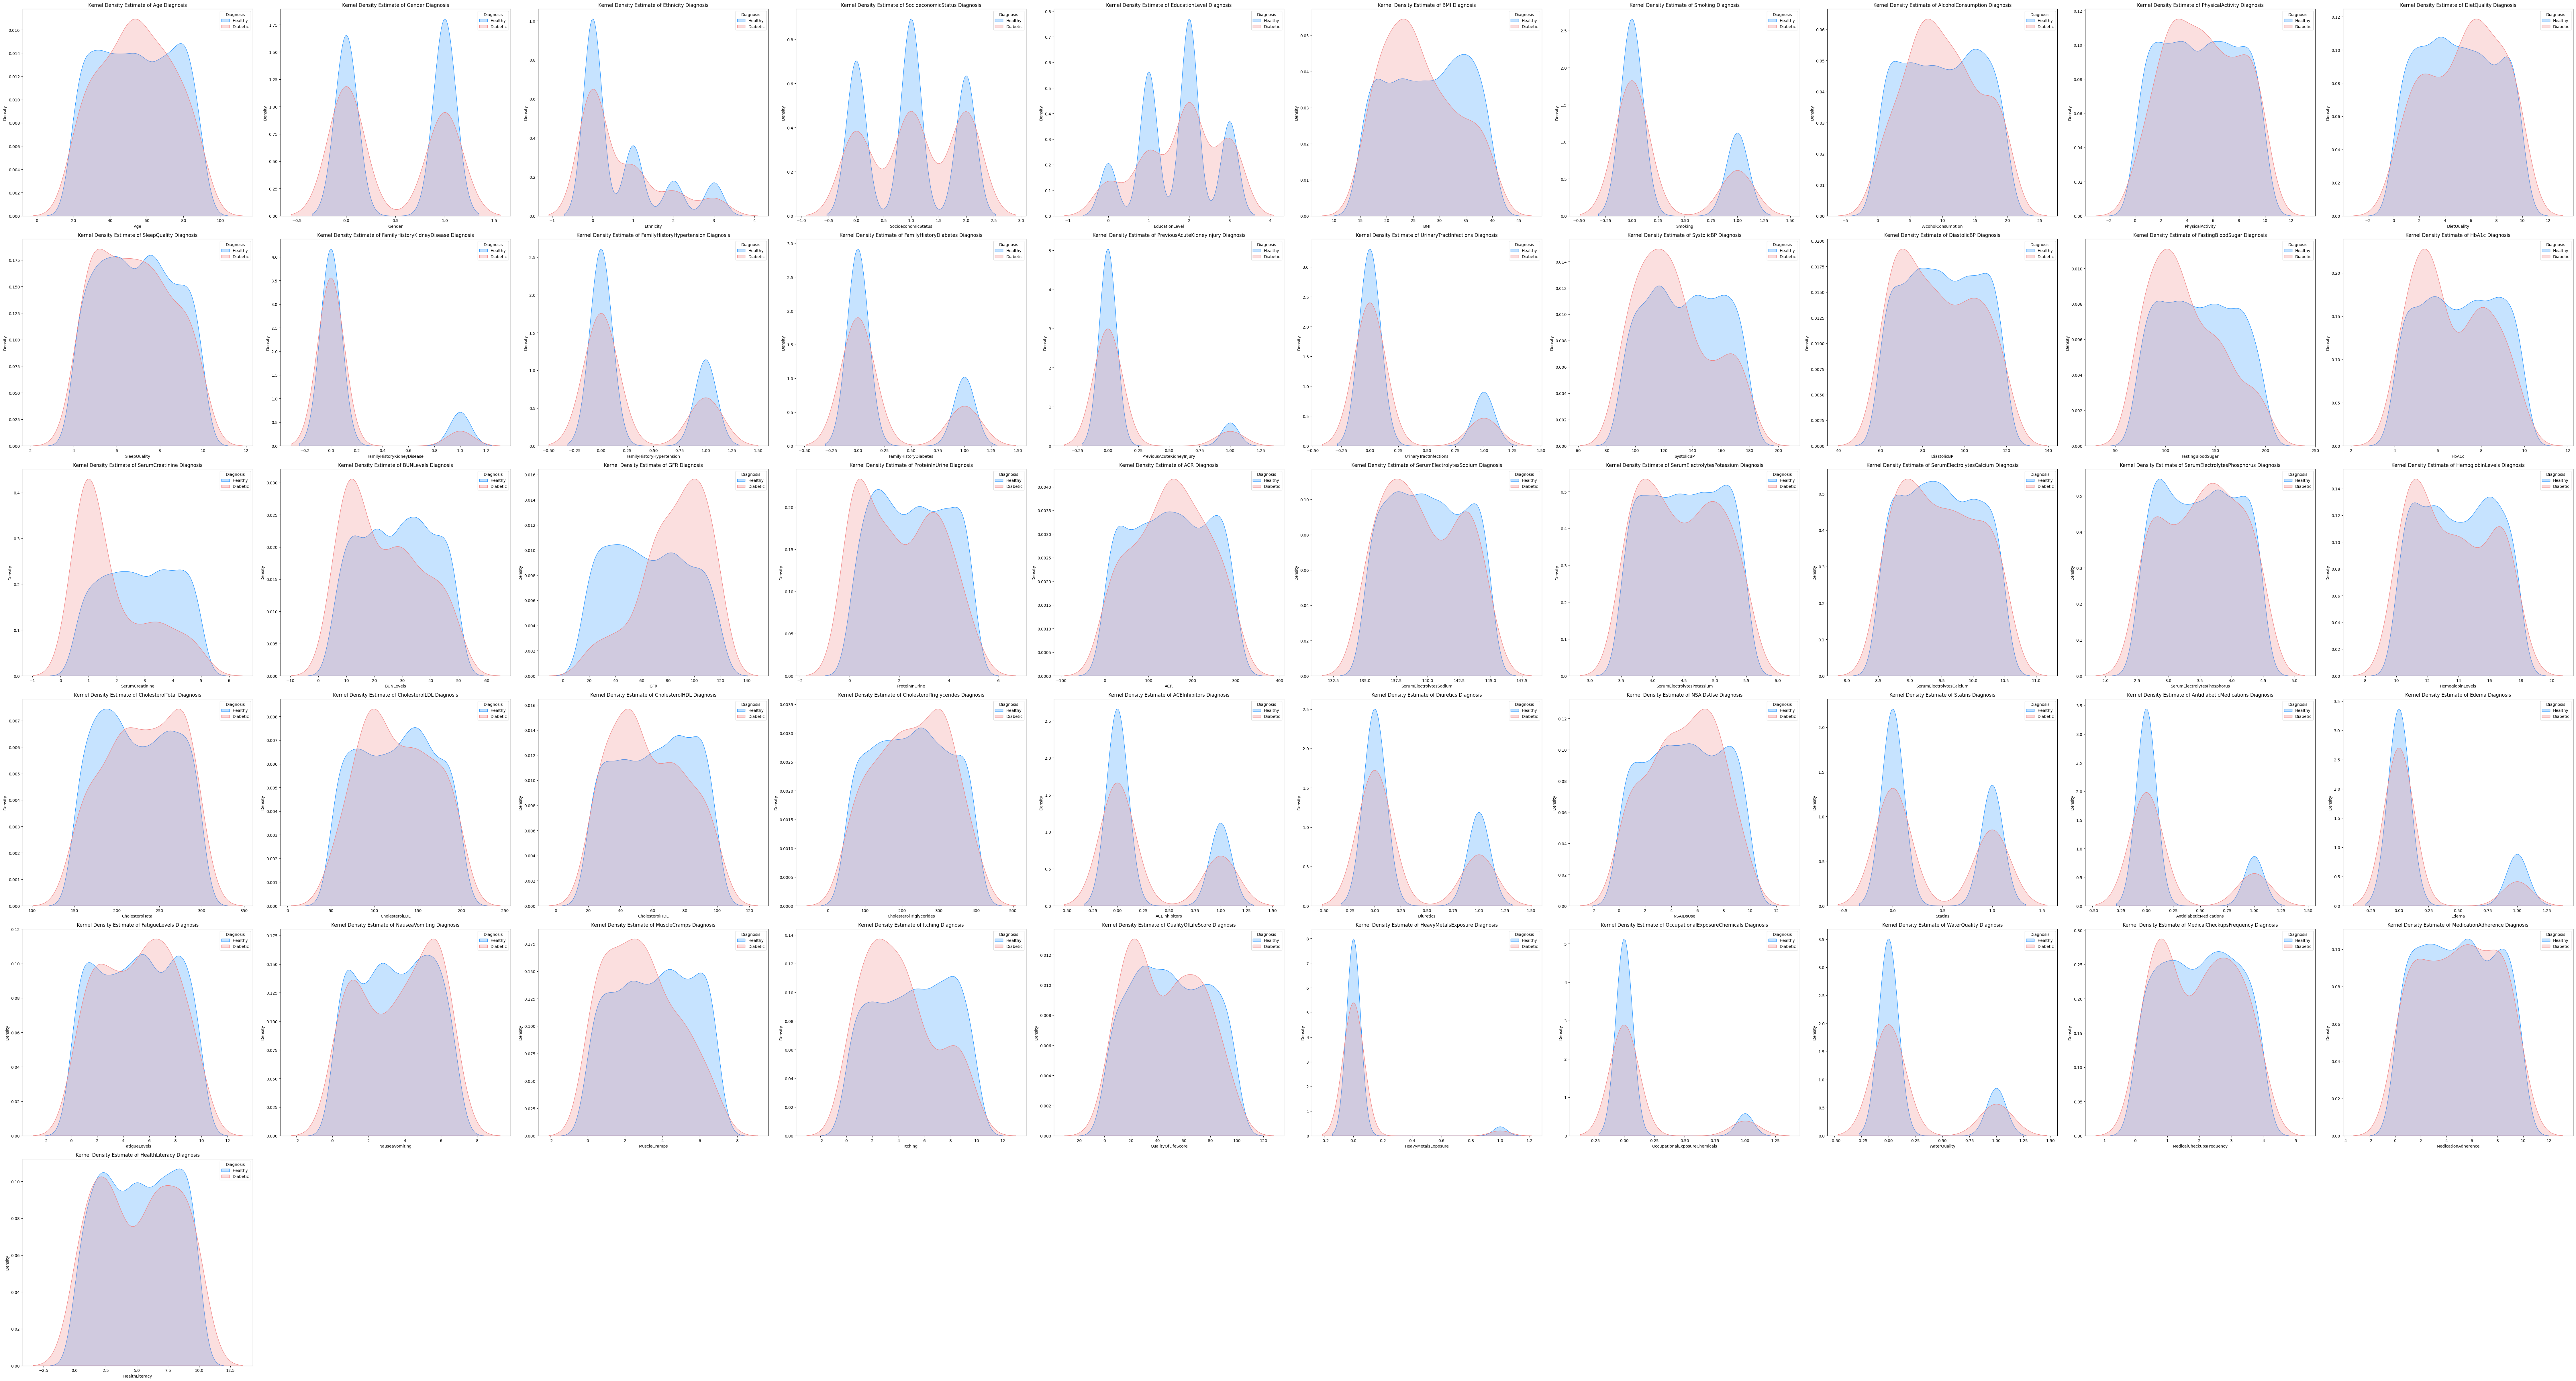

In [14]:
plt.figure(figsize=(90, 80))

variables = ['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy'
      ]

for i, var in enumerate(variables , 1):
    plt.subplot(10,10, i)
    sns.kdeplot(data=df, x=var, hue='Diagnosis', fill=True, common_norm=False, palette =palette )
    plt.title(f'Kernel Density Estimate of {var} Diagnosis')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend(title='Diagnosis', labels=['Healthy', 'Diabetic'])

plt.tight_layout()
plt.show()

In [16]:
df['Diagnosis'].value_counts()

Diagnosis
1    1524
0     135
Name: count, dtype: int64

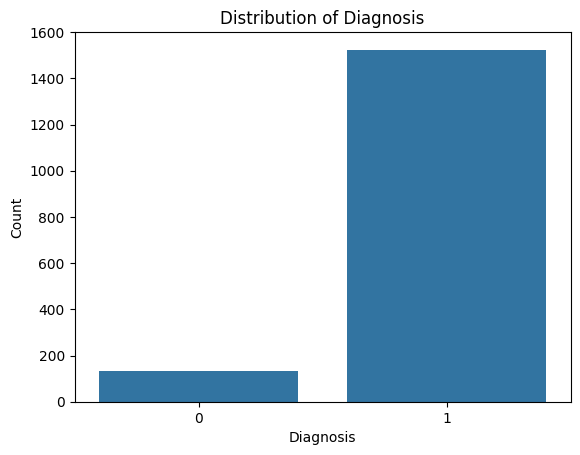

In [17]:
sns.countplot(data=df, x='Diagnosis')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

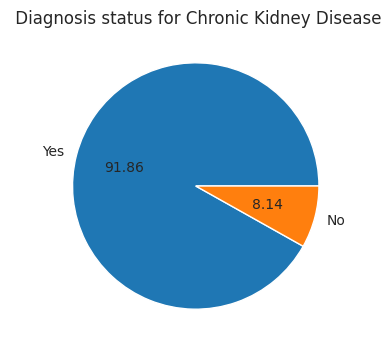

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(4,4))
plt.title(' Diagnosis status for Chronic Kidney Disease')
data = df['Diagnosis'].value_counts()
labels = data.index
plt.pie(data, labels=('Yes', 'No'), autopct='%.2f')
plt.show()

In [20]:
# assding corr between target and features
corr_with_target = df.corr()['Diagnosis'].sort_values()
corr_with_target

GFR                             -0.175988
PatientID                       -0.171405
DietQuality                     -0.044503
CholesterolTotal                -0.041897
EducationLevel                  -0.037343
SocioeconomicStatus             -0.034104
PhysicalActivity                -0.021550
NauseaVomiting                  -0.020670
WaterQuality                    -0.018790
OccupationalExposureChemicals   -0.015118
AntidiabeticMedications         -0.014582
SerumElectrolytesPhosphorus     -0.011338
CholesterolTriglycerides        -0.008489
Statins                         -0.007134
CholesterolLDL                  -0.006809
AlcoholConsumption              -0.006245
PreviousAcuteKidneyInjury       -0.005451
FatigueLevels                   -0.002884
ACR                             -0.001549
Age                              0.000919
MedicationAdherence              0.001532
ACEInhibitors                    0.004221
HealthLiteracy                   0.005186
SerumElectrolytesCalcium         0.006636
NSAIDsUse                        0.006987
Ethnicity                        0.007199
HeavyMetalsExposure              0.010108
MedicalCheckupsFrequency         0.012373
FamilyHistoryDiabetes            0.013852
SleepQuality                     0.021277
FamilyHistoryHypertension        0.022520
SerumElectrolytesPotassium       0.023686
Smoking                          0.026875
Diuretics                        0.028236
SerumElectrolytesSodium          0.032372
UrinaryTractInfections           0.034617
DiastolicBP                      0.036383
QualityOfLifeScore               0.040657
Gender                           0.042239
HemoglobinLevels                 0.044001
CholesterolHDL                   0.044342
Edema                            0.050857
FamilyHistoryKidneyDisease       0.050935
BMI                              0.055222
HbA1c                            0.059999
SystolicBP                       0.083528
ProteinInUrine                   0.090014
BUNLevels                        0.093097
MuscleCramps                     0.094811
FastingBloodSugar                0.095694
Itching                          0.100652
SerumCreatinine                  0.201125
Diagnosis                        1.000000
Name: Diagnosis, dtype: float64

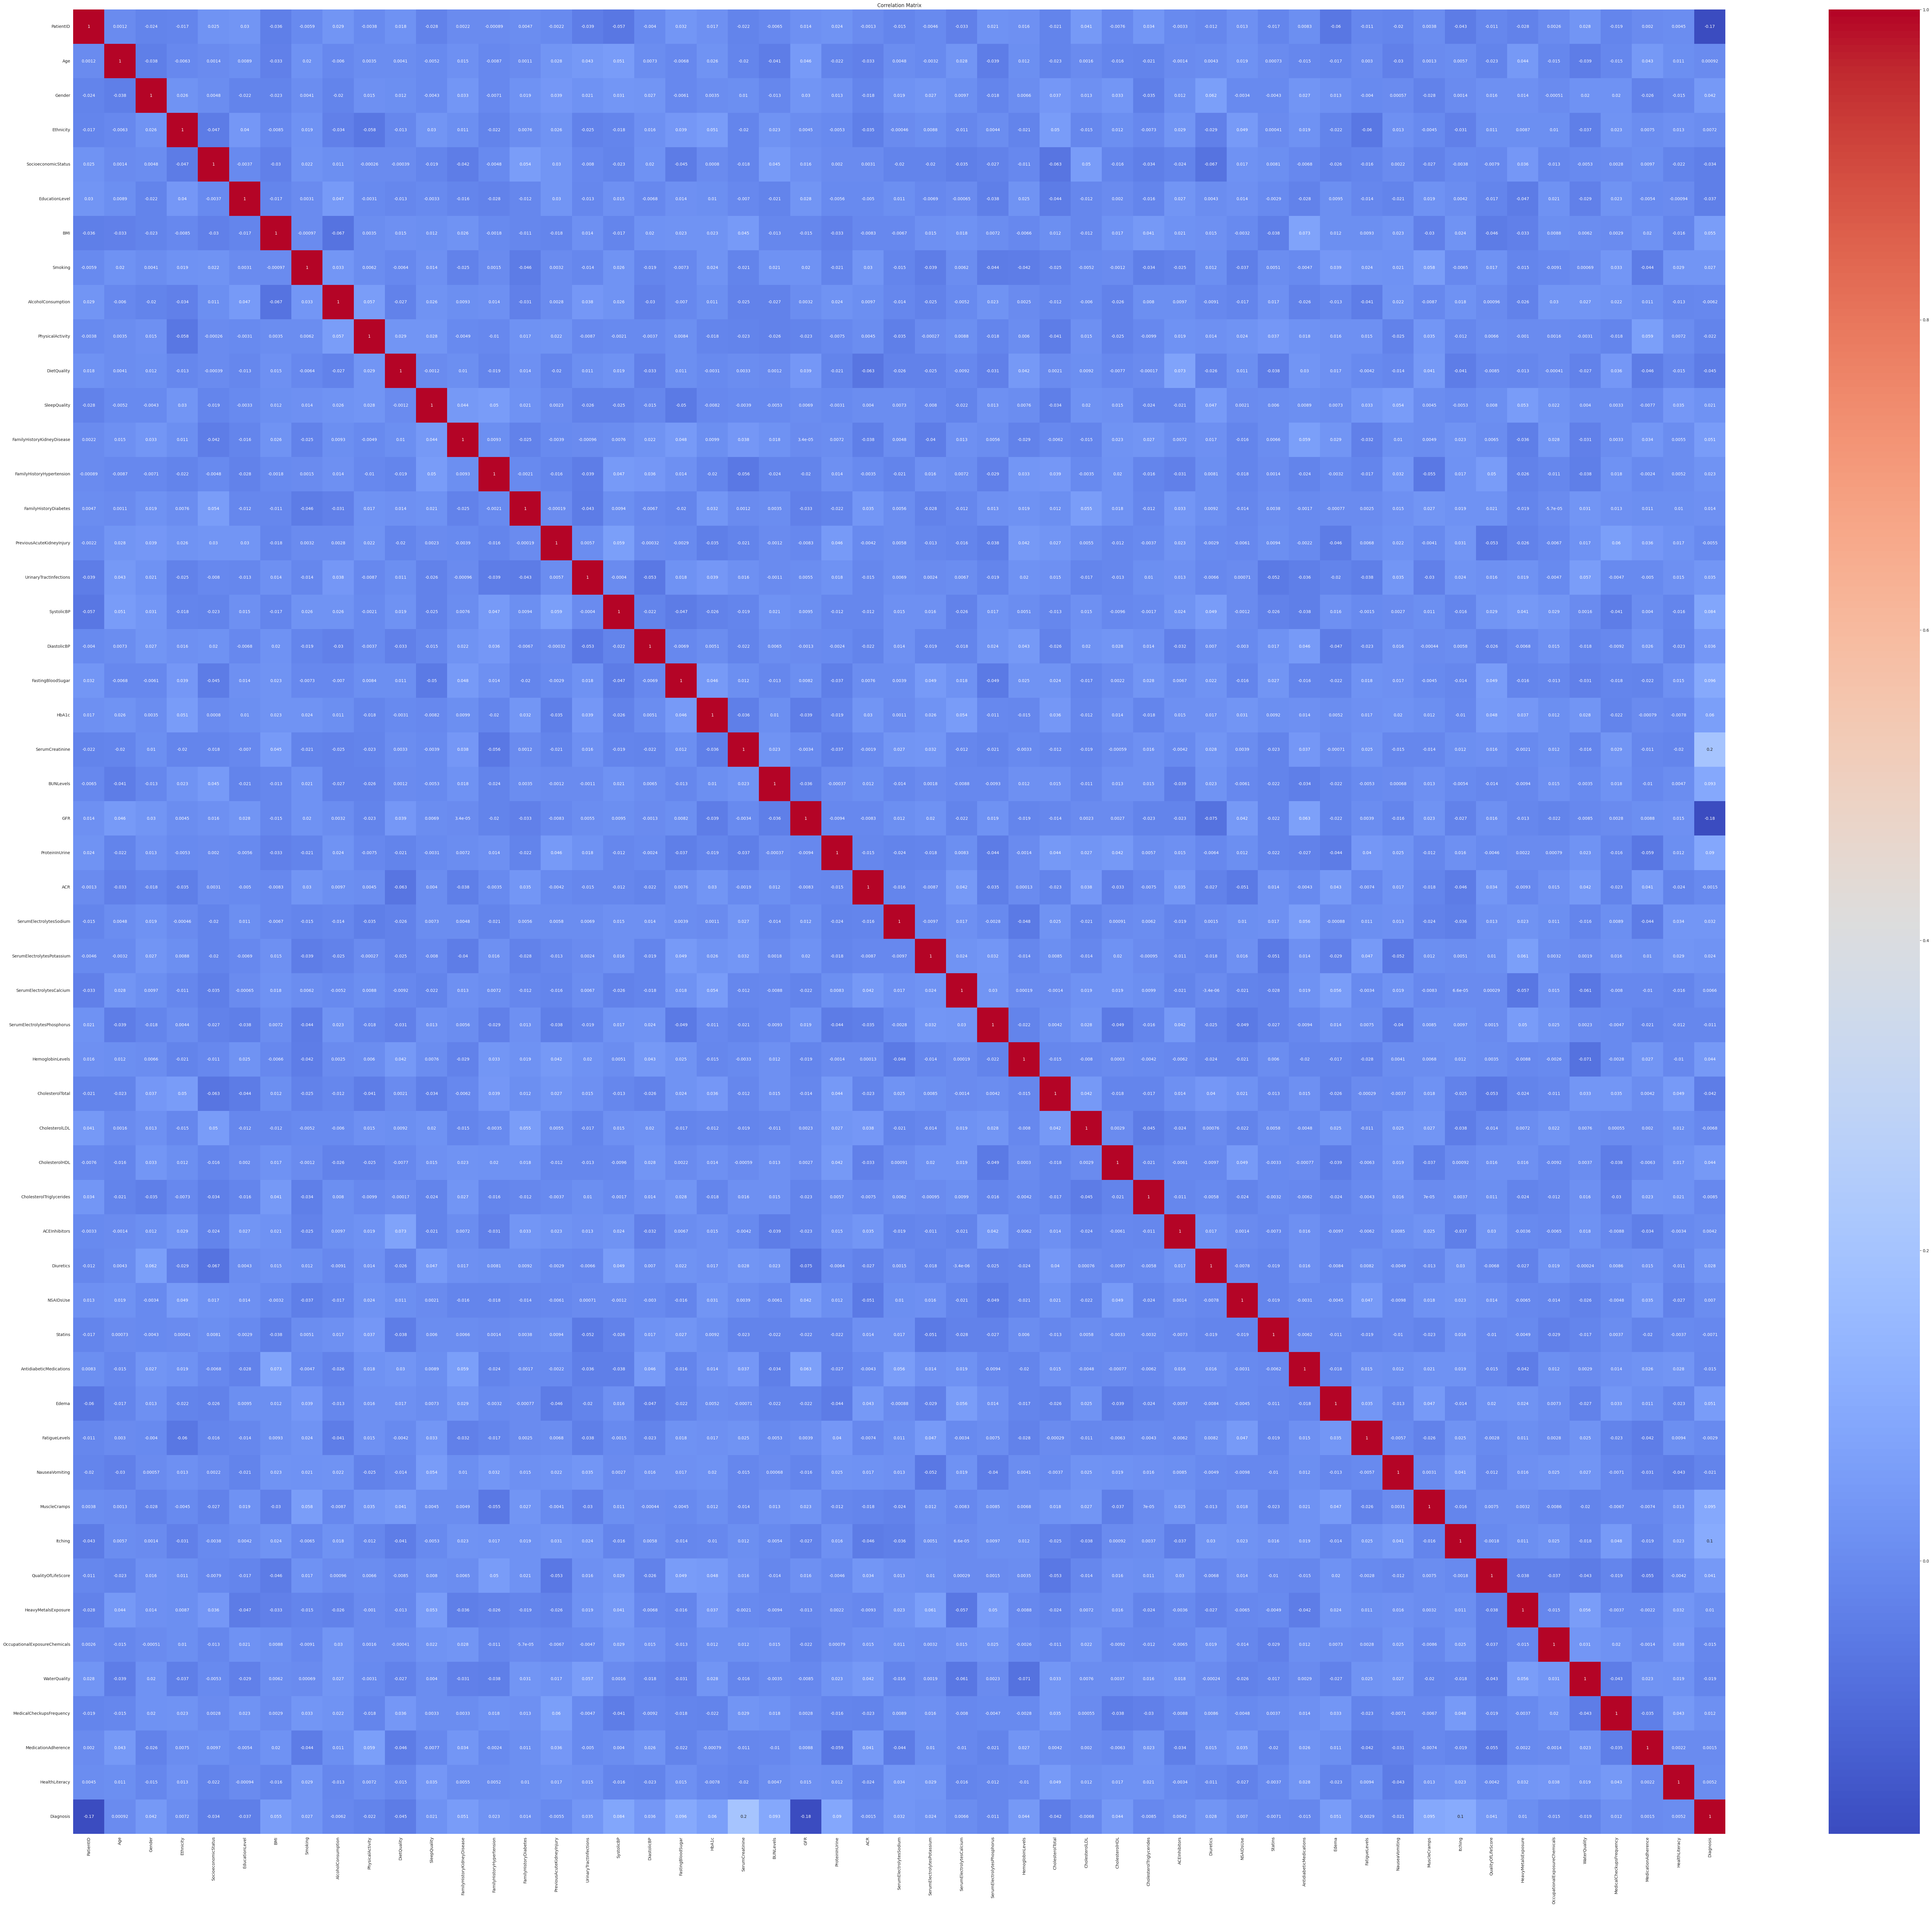

In [21]:
plt.figure(figsize=(90, 80))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
correlation_matrix = df.corr()
strong_correlation_cols = [col for col in correlation_matrix.columns if abs(correlation_matrix.loc['Diagnosis', col]) >= 0.05 and col != 'Diagnosis' and col != 'PatientID']
strong_correlation_cols

['BMI',
 'FamilyHistoryKidneyDisease',
 'SystolicBP',
 'FastingBloodSugar',
 'HbA1c',
 'SerumCreatinine',
 'BUNLevels',
 'GFR',
 'ProteinInUrine',
 'Edema',
 'MuscleCramps',
 'Itching']

In [23]:
df[strong_correlation_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BMI                         1659 non-null   float64
 1   FamilyHistoryKidneyDisease  1659 non-null   int64  
 2   SystolicBP                  1659 non-null   int64  
 3   FastingBloodSugar           1659 non-null   float64
 4   HbA1c                       1659 non-null   float64
 5   SerumCreatinine             1659 non-null   float64
 6   BUNLevels                   1659 non-null   float64
 7   GFR                         1659 non-null   float64
 8   ProteinInUrine              1659 non-null   float64
 9   Edema                       1659 non-null   int64  
 10  MuscleCramps                1659 non-null   float64
 11  Itching                     1659 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 155.7 KB


In [24]:
df[strong_correlation_cols].head()

BMI  FamilyHistoryKidneyDisease  SystolicBP  FastingBloodSugar  \
0  31.069414                           0         113          72.510788   
1  29.692119                           1         120         100.848875   
2  37.394822                           0         147         160.989441   
3  31.329680                           0         117         188.506620   
4  23.726311                           0          98          82.156699   

      HbA1c  SerumCreatinine  BUNLevels        GFR  ProteinInUrine  Edema  \
0  9.212397         4.962531  25.605949  45.703204        0.744980      0   
1  4.604989         3.156799  31.338166  55.784504        3.052317      0   
2  5.432599         3.698236  39.738169  67.559032        1.157839      0   
3  4.144466         2.868468  21.980958  33.202542        3.745871      0   
4  4.262979         3.964877  12.216366  56.319082        2.570993      0   

   MuscleCramps   Itching  
0      4.518513  7.556302  
1      2.202222  6.836766  
2      5.967271  2.144722  
3      2.176387  7.077188  
4      6.800993  3.553118

In [25]:
df.skew()

PatientID                        0.000000
Age                              0.003152
Gender                          -0.061568
Ethnicity                        1.184191
SocioeconomicStatus              0.038585
EducationLevel                  -0.220439
BMI                             -0.041887
Smoking                          0.910715
AlcoholConsumption              -0.010258
PhysicalActivity                 0.006964
DietQuality                      0.023528
SleepQuality                     0.052256
FamilyHistoryKidneyDisease       2.064379
FamilyHistoryHypertension        0.866466
FamilyHistoryDiabetes            1.110886
PreviousAcuteKidneyInjury        2.570968
UrinaryTractInfections           1.422551
SystolicBP                       0.031465
DiastolicBP                      0.011416
FastingBloodSugar                0.081009
HbA1c                            0.009469
SerumCreatinine                  0.010361
BUNLevels                       -0.007497
GFR                              0.015337
ProteinInUrine                   0.024299
ACR                             -0.020966
SerumElectrolytesSodium          0.041241
SerumElectrolytesPotassium      -0.011080
SerumElectrolytesCalcium         0.045467
SerumElectrolytesPhosphorus      0.004036
HemoglobinLevels                 0.015501
CholesterolTotal                 0.038220
CholesterolLDL                  -0.019932
CholesterolHDL                  -0.066157
CholesterolTriglycerides        -0.007820
ACEInhibitors                    0.897961
Diuretics                        0.781020
NSAIDsUse                       -0.029802
Statins                          0.490734
AntidiabeticMedications          1.481701
Edema                            1.486356
FatigueLevels                   -0.017468
NauseaVomiting                  -0.043126
MuscleCramps                    -0.028920
Itching                         -0.043011
QualityOfLifeScore               0.050531
HeavyMetalsExposure              4.450603
OccupationalExposureChemicals    2.613239
WaterQuality                     1.524169
MedicalCheckupsFrequency        -0.009291
MedicationAdherence              0.013389
HealthLiteracy                  -0.035045
Diagnosis                       -3.065038
dtype: float64

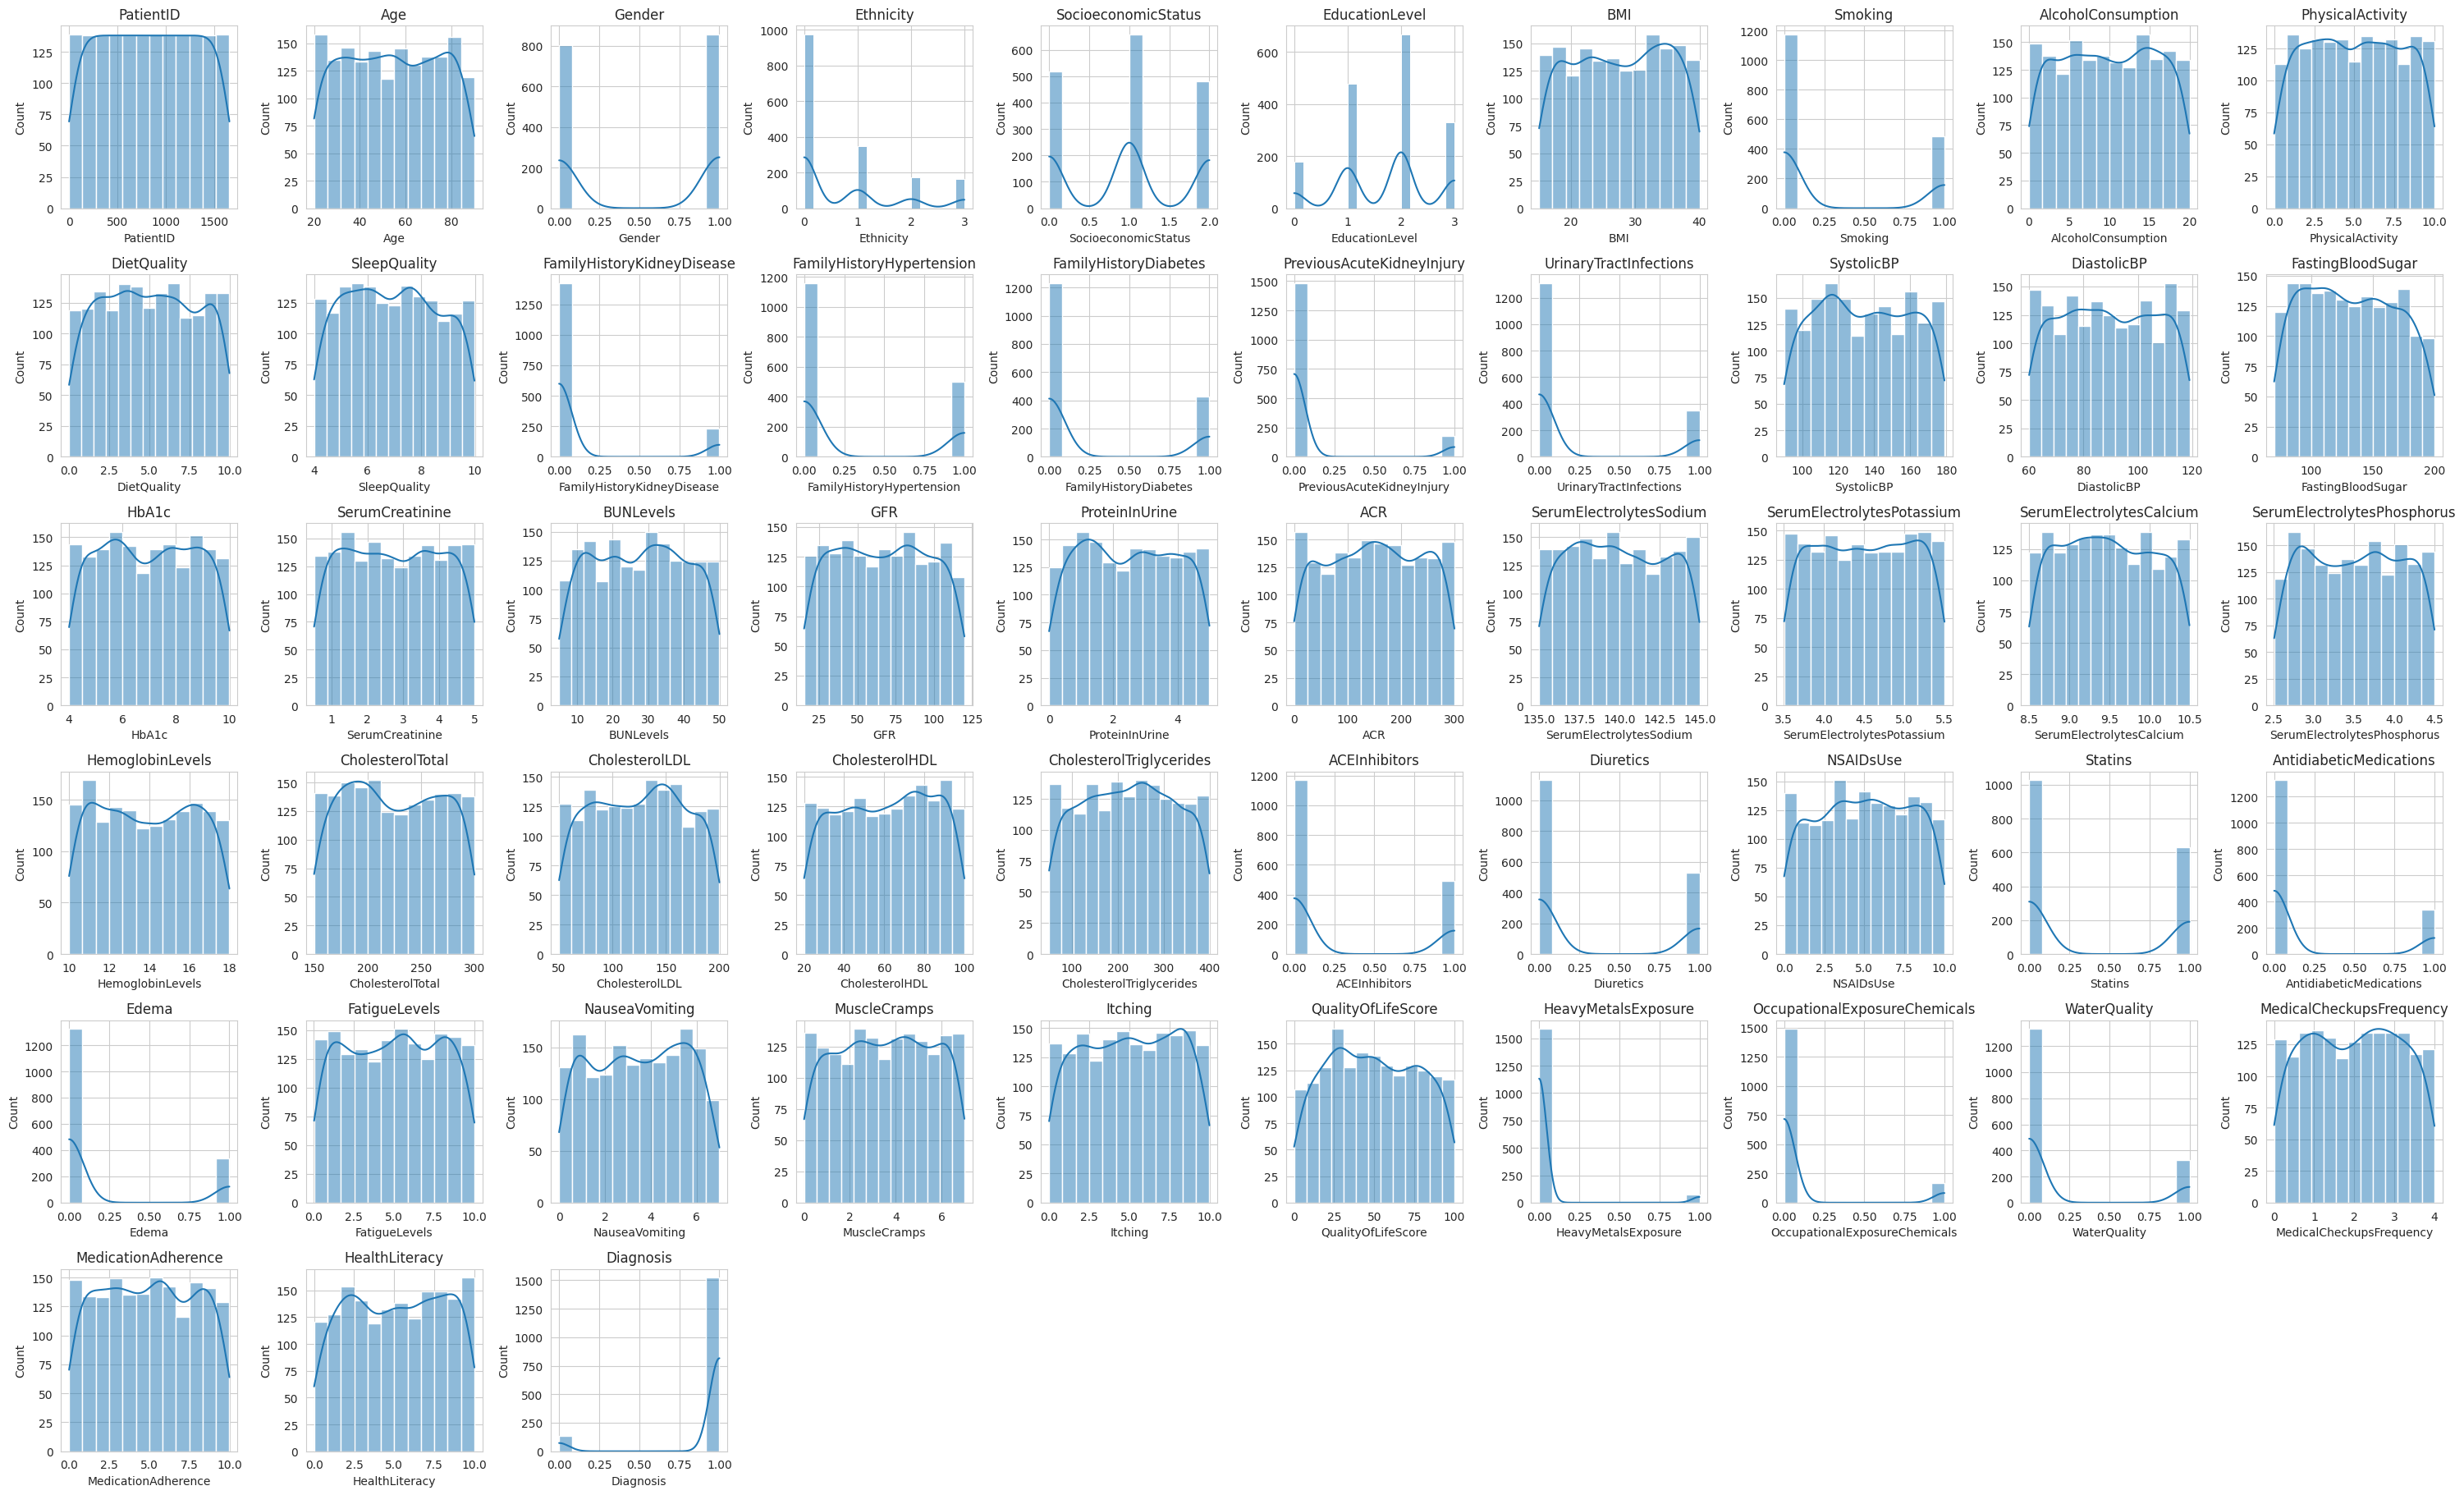

In [26]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(30, 30))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numerical columns and create histograms
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    try:
      sns.histplot(df[col], ax=axes[i], kde=True)
      axes[i].set_title(col)
    except ValueError:  # Handle potential errors (e.g., non-numeric data in a column)
      print(f"Skipping column '{col}' due to an error.")
      continue

# Hide any unused subplots
for i in range(len(df.select_dtypes(include=np.number).columns), len(axes)):
    axes[i].set_visible(False)


plt.tight_layout()
plt.show()

In [27]:
def detect_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data.index[(data[column] < lower_bound) | (data[column] > upper_bound)].tolist()

    return outliers


In [28]:
numerical_features = df.select_dtypes(include=np.number)
for column in numerical_features.columns:
    outliers = detect_outliers_iqr(df, column)
    if outliers:
        print(f"Outliers in column '{column}': {outliers}")
    else:
        print(f"No outliers found in column '{column}'.")

No outliers found in column 'PatientID'.
No outliers found in column 'Age'.
No outliers found in column 'Gender'.
Outliers in column 'Ethnicity': [9, 24, 42, 49, 79, 95, 97, 102, 114, 120, 122, 139, 153, 166, 167, 178, 188, 197, 201, 212, 214, 222, 278, 296, 298, 304, 305, 308, 313, 323, 327, 350, 353, 367, 370, 374, 411, 417, 431, 433, 437, 444, 452, 453, 455, 466, 474, 478, 488, 489, 497, 516, 518, 519, 530, 535, 537, 542, 554, 582, 609, 625, 632, 657, 674, 676, 687, 689, 698, 710, 717, 719, 720, 723, 726, 742, 764, 772, 774, 791, 800, 805, 821, 829, 855, 859, 866, 882, 922, 934, 937, 939, 945, 980, 983, 985, 996, 1043, 1060, 1084, 1086, 1087, 1095, 1104, 1110, 1131, 1133, 1138, 1142, 1152, 1160, 1162, 1174, 1180, 1191, 1206, 1210, 1223, 1228, 1243, 1251, 1258, 1272, 1280, 1281, 1290, 1297, 1303, 1320, 1321, 1323, 1333, 1349, 1350, 1357, 1359, 1370, 1391, 1404, 1406, 1407, 1416, 1420, 1426, 1440, 1448, 1465, 1496, 1511, 1525, 1531, 1542, 1547, 1557, 1564, 1582, 1591, 1609, 1619, 1635

# **Data Cleaning**

In [ ]:
df.drop(['DoctorInCharge'], axis=1, inplace=True)

In [29]:
df.drop(['PatientID'], axis=1, inplace=True)

# **Data Binning & Data Encoding**

In [ ]:
# Data Encoding ..

def label_encoding(df, columns):
    df_encoded = df.copy()
    for col in columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
    return df_encoded

In [ ]:
# BMI Binning
df['BMI'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [ ]:
df['BMI'].value_counts()

BMI
Obese          697
Normal         405
Overweight     316
Underweight    241
Name: count, dtype: int64

In [ ]:
# BMI Encoding
df = label_encoding(df, ['BMI'])

In [ ]:
# HbA1c before Binning
df['HbA1c'].value_counts()

HbA1c
9.212397    1
4.101264    1
9.205298    1
6.522615    1
9.046931    1
           ..
6.486157    1
5.094745    1
9.699015    1
4.628081    1
5.921710    1
Name: count, Length: 1659, dtype: int64

In [ ]:
# HbA1c Binning
bins = [0, 5.7, 6.4, np.inf]
labels = ['Normal', 'Prediabetes', 'Diabetes']
df['HbA1c'] = pd.cut(df['HbA1c'], bins=bins, labels=labels, right=False)

In [ ]:
df['HbA1c'].value_counts()

HbA1c
Diabetes       972
Normal         481
Prediabetes    206
Name: count, dtype: int64

In [ ]:
# HbA1c Encoding
df = label_encoding(df, ['HbA1c'])

In [ ]:
# Fasting Blood Sugar
df['FastingBloodSugar'].value_counts()

FastingBloodSugar
72.510788     1
77.243630     1
116.186595    1
164.756009    1
98.561231     1
             ..
128.496745    1
110.032364    1
195.186441    1
73.590129     1
161.181060    1
Name: count, Length: 1659, dtype: int64

In [ ]:
# Fasting Blood Sugar Binning
bins = [0, 100, 125, np.inf]
labels = ['Normal', 'Prediabetes', 'Diabetes']
df['FastingBloodSugar'] = pd.cut(df['FastingBloodSugar'], bins=bins, labels=labels, right=False)

In [ ]:
df['FastingBloodSugar'].value_counts()

FastingBloodSugar
Diabetes       910
Normal         408
Prediabetes    341
Name: count, dtype: int64

In [ ]:
# Fasting Blood Sugar Encoding
df = label_encoding(df, ['FastingBloodSugar'])

In [ ]:
# Serum Creatinine before Binning
df['SerumCreatinine'].value_counts()

SerumCreatinine
4.962531    1
1.858070    1
4.864725    1
2.365369    1
4.779929    1
           ..
1.932233    1
2.672996    1
4.591103    1
4.746209    1
2.722445    1
Name: count, Length: 1659, dtype: int64

In [ ]:
# Serum Creatinine Binning
bins = [0, 1.5, 2.5, np.inf]
labels = ['Normal', 'Moderate', 'High']

In [ ]:
df['SerumCreatinine'] = pd.cut(df['SerumCreatinine'], bins=bins, labels=labels, right=False)

In [ ]:
df['SerumCreatinine'].value_counts()

SerumCreatinine
High        918
Normal      377
Moderate    364
Name: count, dtype: int64

In [ ]:
# Serum Creatinine Encoding
df = label_encoding(df, ['SerumCreatinine'])

In [ ]:
# BUN Levels before Binning
df[ 'BUNLevels'].value_counts ()

BUNLevels
25.605949    1
31.402254    1
41.268026    1
37.448942    1
42.483264    1
            ..
44.242422    1
29.200557    1
41.674126    1
30.740726    1
22.017451    1
Name: count, Length: 1659, dtype: int64

In [ ]:
# BUN Levels Binning
bins = [0, 20, 40, np.inf]
labels = ['Normal', 'Moderate', 'High']
df['BUNLevels'] = pd.cut(df['BUNLevels'], bins=bins, labels=labels, right=False)

In [ ]:
df['BUNLevels'].value_counts()

BUNLevels
Moderate    754
Normal      545
High        360
Name: count, dtype: int64

In [ ]:
# BUN Levels Encoding
df = label_encoding(df, ['BUNLevels'])

In [ ]:
# GFR before Binning
df['GFR'].value_counts()

GFR
45.703204    1
81.700840    1
23.282328    1
16.887620    1
64.553176    1
            ..
39.671175    1
27.582589    1
70.102733    1
69.287145    1
25.306249    1
Name: count, Length: 1659, dtype: int64

In [ ]:
# GRR Binning
bins = [0, 15, 30, 60, 90, np.inf]
labels = ['Kidney Failure', 'Severe', 'Moderate', 'Mild', 'Normal']
df['GFR'] = pd.cut(df['GFR'], bins=bins, labels=labels, right=False)

In [ ]:
df['GFR'].value_counts()

GFR
Moderate          480
Mild              480
Normal            454
Severe            245
Kidney Failure      0
Name: count, dtype: int64

In [ ]:
# GFR Encoding
df = label_encoding(df, ['GFR'])

In [ ]:
# Protein in Urine before Binning
df['ProteinInUrine'].value_counts()

ProteinInUrine
0.744980    1
4.995894    1
2.588273    1
3.153684    1
3.259252    1
           ..
2.865885    1
3.750188    1
4.278483    1
0.893258    1
0.335946    1
Name: count, Length: 1659, dtype: int64

In [ ]:
# protein in Urine Binning
bins = [0, 0.3, 3.5, np.inf]
labels = ['Normal', 'Moderate', 'High']
df['ProteinInUrine'] = pd.cut(df['ProteinInUrine'], bins=bins, labels=labels, right=False)

In [ ]:
df['ProteinInUrine'].value_counts()

ProteinInUrine
Moderate    1065
High         499
Normal        95
Name: count, dtype: int64

In [ ]:
# protein in Urine Encoding
df = label_encoding(df, ['ProteinInUrine'])

In [ ]:
# Muscle Cramps before Binning
df['MuscleCramps'].value_counts()

MuscleCramps
4.518513    1
5.401385    1
3.888450    1
5.052587    1
0.473503    1
           ..
6.601388    1
3.054837    1
6.955352    1
5.813800    1
5.876286    1
Name: count, Length: 1659, dtype: int64

In [ ]:
# Muscle Cramps Binning
bins = [0, 2, 5, np.inf]
labels = ['Low', 'Moderate', 'High']

df['MuscleCramps'] = pd.cut(df['MuscleCramps'], bins=bins, labels=labels, right=False)

In [ ]:
df['MuscleCramps'].value_counts()

MuscleCramps
Moderate    737
High        476
Low         446
Name: count, dtype: int64

In [ ]:
# Muscle Cramps Encoding
df = label_encoding(df, ['MuscleCramps'])

In [ ]:
# Itching before Binning
df[ 'Itching'].value_counts()

Itching
7.556302    1
9.030431    1
7.098593    1
4.161495    1
2.120473    1
           ..
3.755993    1
1.144612    1
1.257024    1
0.871087    1
9.293499    1
Name: count, Length: 1659, dtype: int64

In [ ]:
# Itching Binning
bins = [0, 2, 5, np.inf]
labels = ['Low', 'Moderate', 'High']
df['Itching'] = pd.cut(df['Itching'], bins=bins, labels=labels, right=False)

In [ ]:
df['Itching'].value_counts()

Itching
High        842
Moderate    504
Low         313
Name: count, dtype: int64

In [ ]:
# Itching Encoding
df = label_encoding(df, ['Itching'])

In [ ]:
# SystolicBP before Binning
df['SystolicBP'].value_counts()

SystolicBP
116    36
118    29
141    29
168    28
150    26
       ..
140    13
153    13
155    11
169    11
130    11
Name: count, Length: 90, dtype: int64

In [ ]:
# SystolicBP Binning
bins = [0, 120, 140, 160, np.inf]
labels = ['Low', 'Normal', 'Prehypertension', 'High']
df['SystolicBP'] = pd.cut(df['SystolicBP'], bins=bins, labels=labels, right=False)

In [ ]:
df['SystolicBP'].value_counts()

SystolicBP
Low                573
High               366
Prehypertension    364
Normal             356
Name: count, dtype: int64

In [ ]:
# SystolicBP Encoding
df = label_encoding(df, ['SystolicBP'])

# **Training & Testing split**

In [ ]:
X = df[strong_correlation_cols]
y = df['Diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = RobustScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# **Helpers**

In [ ]:
def give_me_report(model):
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  y_pred = model.predict(X_test)

  print("Train Data:")
  print("Accuracy:", accuracy_score(y_train, y_pred_train))
  print("___________________________________________________")
  print(f"Confusion Matrix: \n{confusion_matrix(y_train, y_pred_train)}")
  print("___________________________________________________")
  print(f"ROC AUC Score: {roc_auc_score(y_train, y_pred_train)}")
  print("___________________________________________________")
  print(classification_report(y_train, y_pred_train))

  print("---------------------------------------------------")
  print("Test Data:")
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred_test)}")
  print("___________________________________________________")
  print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}")
  print("___________________________________________________")
  print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_test)}")
  print("___________________________________________________")
  print(classification_report(y_test, y_pred))
  print(f"Cross Validation Score: {cross_val_score(model, X_train, y_train, cv=5).mean()}")

In [ ]:
def plot_confusion_matrix(model):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# **Logistic Regression**

In [ ]:
log_reg = LogisticRegression()

In [ ]:
grid_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'penalty': ['l1', 'l2'],
               'solver': ['liblinear', 'saga']
}

In [ ]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=grid_params, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [ ]:
print(grid_search.best_params_)

{'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
best_log_reg = grid_search.best_estimator_

In [ ]:
y_pred = best_log_reg.predict(X_test)

In [ ]:
give_me_report(best_log_reg)

Train Data:
Accuracy: 0.7582236842105263
___________________________________________________
Confusion Matrix: 
[[930 286]
 [302 914]]
___________________________________________________
ROC AUC Score: 0.7582236842105263
___________________________________________________
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1216
           1       0.76      0.75      0.76      1216

    accuracy                           0.76      2432
   macro avg       0.76      0.76      0.76      2432
weighted avg       0.76      0.76      0.76      2432

---------------------------------------------------
Test Data:
Accuracy Score: 0.7560240963855421
___________________________________________________
Confusion Matrix: 
[[ 16   8]
 [ 73 235]]
___________________________________________________
ROC AUC Score: 0.7148268398268399
___________________________________________________
              precision    recall  f1-score   support

           0   

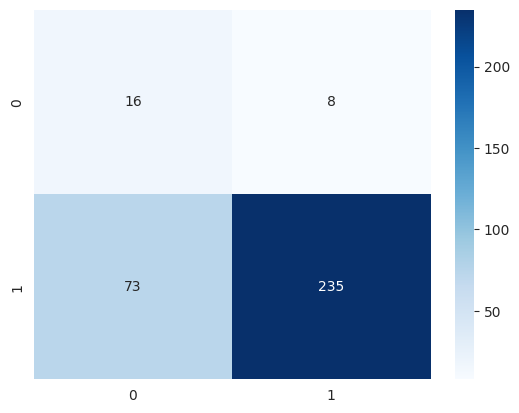

In [ ]:
plot_confusion_matrix(best_log_reg)




# **ْXG Boost**

In [ ]:
xgboost = XGBClassifier()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

In [ ]:
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring= 'roc_auc')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [ ]:
print(grid_search.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}


In [ ]:
best_xgboost = grid_search.best_estimator_

In [ ]:
y_pred = best_xgboost.predict(X_test)

In [ ]:
give_me_report(best_xgboost)

Train Data:
Accuracy: 0.9983552631578947
___________________________________________________
Confusion Matrix: 
[[1212    4]
 [   0 1216]]
___________________________________________________
ROC AUC Score: 0.9983552631578948
___________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       1.00      1.00      1.00      1216

    accuracy                           1.00      2432
   macro avg       1.00      1.00      1.00      2432
weighted avg       1.00      1.00      1.00      2432

---------------------------------------------------
Test Data:
Accuracy Score: 0.9337349397590361
___________________________________________________
Confusion Matrix: 
[[ 10  14]
 [  8 300]]
___________________________________________________
ROC AUC Score: 0.6953463203463204
___________________________________________________
              precision    recall  f1-score   support

           

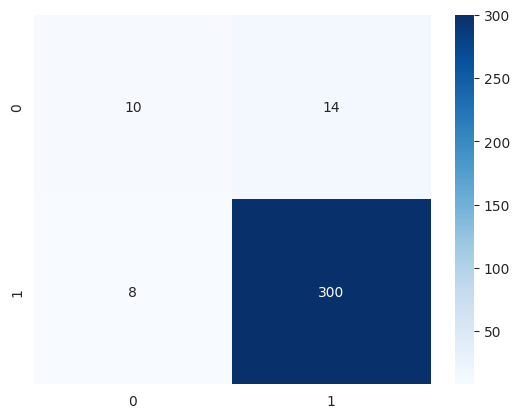

In [ ]:
plot_confusion_matrix(best_xgboost)

# **Support Vector Machine (SVM)**

In [ ]:
svm = SVC()

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1]
}

In [ ]:
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
print(grid_search.best_params_)

{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
best_svm = grid_search.best_estimator_

In [ ]:
y_pred = best_svm.predict(X_test)

In [ ]:
give_me_report(best_svm)

Train Data:
Accuracy: 0.9950657894736842
___________________________________________________
Confusion Matrix: 
[[1216    0]
 [  12 1204]]
___________________________________________________
ROC AUC Score: 0.9950657894736843
___________________________________________________
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1216
           1       1.00      0.99      1.00      1216

    accuracy                           1.00      2432
   macro avg       1.00      1.00      1.00      2432
weighted avg       1.00      1.00      1.00      2432

---------------------------------------------------
Test Data:
Accuracy Score: 0.9186746987951807
___________________________________________________
Confusion Matrix: 
[[  3  21]
 [  6 302]]
___________________________________________________
ROC AUC Score: 0.5527597402597403
___________________________________________________
              precision    recall  f1-score   support

           

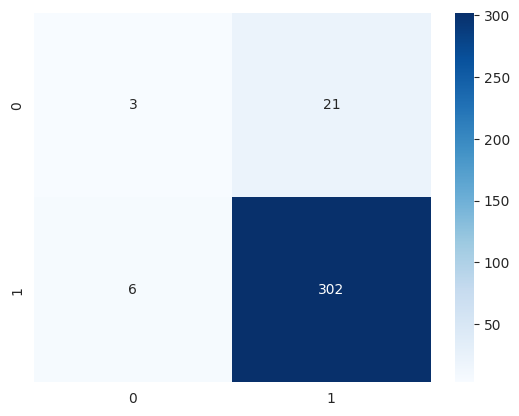

In [ ]:
plot_confusion_matrix(best_svm)

# **K-Nearest Neighbor(KNN)**

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}



In [ ]:
grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [ ]:
print(grid_search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
best_knn = grid_search.best_estimator_

In [ ]:
y_pred = best_knn.predict(X_test)

In [ ]:
give_me_report(best_knn)

Train Data:
Accuracy: 0.9691611842105263
___________________________________________________
Confusion Matrix: 
[[1214    2]
 [  73 1143]]
___________________________________________________
ROC AUC Score: 0.9691611842105263
___________________________________________________
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1216
           1       1.00      0.94      0.97      1216

    accuracy                           0.97      2432
   macro avg       0.97      0.97      0.97      2432
weighted avg       0.97      0.97      0.97      2432

---------------------------------------------------
Test Data:
Accuracy Score: 0.8704819277108434
___________________________________________________
Confusion Matrix: 
[[ 11  13]
 [ 30 278]]
___________________________________________________
ROC AUC Score: 0.680465367965368
___________________________________________________
              precision    recall  f1-score   support

           0

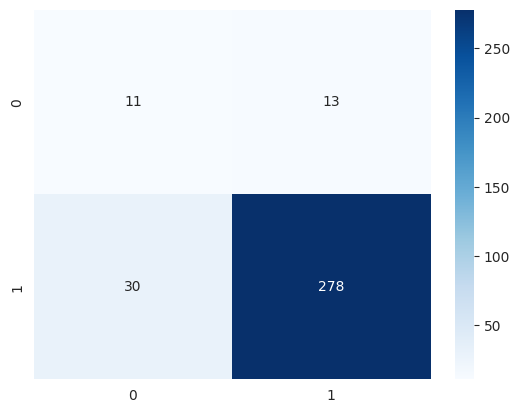

In [ ]:
plot_confusion_matrix(best_knn)

# **AdaBoost**

In [ ]:
ada_boost = AdaBoostClassifier()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [ ]:
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]})

In [ ]:
print(grid_search.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 200}


In [ ]:
best_Ada_boost = grid_search.best_estimator_

In [ ]:
y_pred = best_Ada_boost.predict(X_test)

In [ ]:
give_me_report(best_Ada_boost)

Train Data:
Accuracy: 0.9634046052631579
___________________________________________________
Confusion Matrix: 
[[1146   70]
 [  19 1197]]
___________________________________________________
ROC AUC Score: 0.963404605263158
___________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1216
           1       0.94      0.98      0.96      1216

    accuracy                           0.96      2432
   macro avg       0.96      0.96      0.96      2432
weighted avg       0.96      0.96      0.96      2432

---------------------------------------------------
Test Data:
Accuracy Score: 0.9487951807228916
___________________________________________________
Confusion Matrix: 
[[  9  15]
 [  2 306]]
___________________________________________________
ROC AUC Score: 0.6842532467532467
___________________________________________________
              precision    recall  f1-score   support

           0

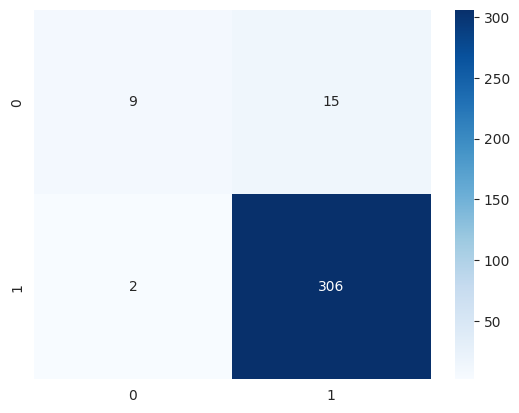

In [ ]:
plot_confusion_matrix(best_Ada_boost)

In [ ]:
joblib.dump(best_Ada_boost, 'best_Ada_boost.pkl')

['best_Ada_boost.pkl']

# **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
best_dt = grid_search.best_estimator_

In [ ]:
y_pred = best_dt.predict(X_test)

In [ ]:
give_me_report(best_dt)

Train Data:
Accuracy: 0.9728618421052632
___________________________________________________
Confusion Matrix: 
[[1174   42]
 [  24 1192]]
___________________________________________________
ROC AUC Score: 0.9728618421052632
___________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1216
           1       0.97      0.98      0.97      1216

    accuracy                           0.97      2432
   macro avg       0.97      0.97      0.97      2432
weighted avg       0.97      0.97      0.97      2432

---------------------------------------------------
Test Data:
Accuracy Score: 0.8795180722891566
___________________________________________________
Confusion Matrix: 
[[ 10  14]
 [ 26 282]]
___________________________________________________
ROC AUC Score: 0.6661255411255411
___________________________________________________
              precision    recall  f1-score   support

           

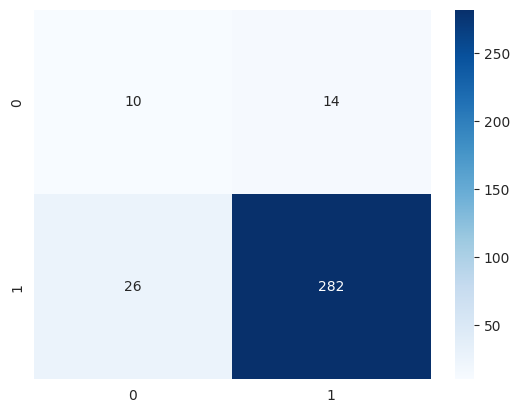

In [ ]:
plot_confusion_matrix(best_dt)

# **Random forest**

In [ ]:
rf = RandomForestClassifier()

In [ ]:
param_grid = {'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
print(grid_search.best_params_)

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_rf = grid_search.best_estimator_

In [ ]:
y_pred = best_rf.predict(X_test)

In [ ]:
give_me_report(best_rf)

Train Data:
Accuracy: 0.998766447368421
___________________________________________________
Confusion Matrix: 
[[1214    2]
 [   1 1215]]
___________________________________________________
ROC AUC Score: 0.998766447368421
___________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       1.00      1.00      1.00      1216

    accuracy                           1.00      2432
   macro avg       1.00      1.00      1.00      2432
weighted avg       1.00      1.00      1.00      2432

---------------------------------------------------
Test Data:
Accuracy Score: 0.9397590361445783
___________________________________________________
Confusion Matrix: 
[[  8  16]
 [  4 304]]
___________________________________________________
ROC AUC Score: 0.6601731601731602
___________________________________________________
              precision    recall  f1-score   support

           0 

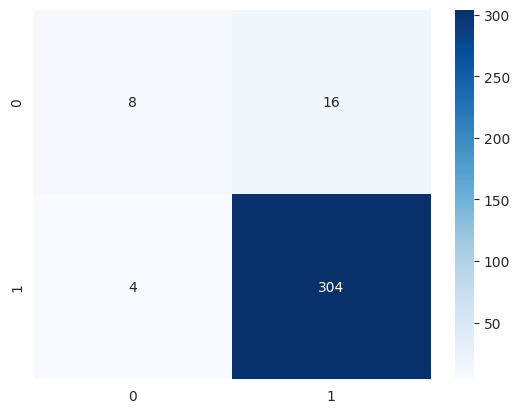

In [ ]:
plot_confusion_matrix(best_rf)

# **Conclusion:**

* In this project, we applied and analyzed a variety of machine learning models to classify data related to chronic kidney disease. The models we tried include logistic regression, XGBoost, SVM, KNN, AdaBoost, decision tree, and random forest.

* The performance of the models was evaluated using multiple metrics such as accuracy, recall, and ROC AUC score, on both training and test data. The results showed a variation in performance between the models, with some achieving higher accuracy and a better balance between precision and recall.


 _______________________________________________________________________

>  # Based on these results :

* we chose the ( AdaBoost model ) for use in the web application designed to classify chronic kidney disease cases. The AdaBoost model showed a good balance between precision and recall on the test data, making it an excellent choice for the web application.